In [1]:
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv('../KivaLoans_data/X_matrix2.csv')

In [3]:
y = pd.read_csv('../KivaLoans_data/y_matrix2.csv')

In [4]:
y = y['PercentFunded']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline
import xgboost as xgb

In [9]:
ohe = OneHotEncoder()

In [9]:

xgbr1 = xgb.XGBRegressor(n_jobs=2)

In [10]:
xgb_pipe1 = Pipeline([('ohe', ohe), ('xgbr', xgbr1)])

In [8]:
from sklearn.model_selection import GridSearchCV

In [11]:
params1 = {
    'xgbr__max_depth': [1, 3, 5],
    'xgbr__n_estimators': [100, 300, 500]
}

In [12]:
gsearch1 = GridSearchCV(xgb_pipe1, params1, scoring='r2', cv=5, n_jobs=3)
gsearch1.fit(X_train, y_train)

[21:05:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ohe',
                                        OneHotEncoder(cols=None,
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      return_df=True,
                                                      use_cat_names=False,
                                                      verbose=0)),
                                       ('xgbr',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                            

In [16]:
gsearch1.best_score_, gsearch1.best_params_

(0.6950382356128417, {'xgbr__max_depth': 5, 'xgbr__n_estimators': 500})

In [21]:
xgb_pipe1.steps[-1][1].set_params(max_depth= 5, n_estimators=500)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=2, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [22]:
xgb_pipe1

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=None, drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('xgbr',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=5, min_child_weight=1,
                              missing=None, n_estimators=500, n_jobs=2,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample

In [23]:
xgb_pipe1.fit(X_train, y_train)

[21:23:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['activity', 'sector', 'country',
                                     'repayment_interval', 'PostedDayofWeek'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('xgbr',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=5, min_child_weight=1,
                              missing=None, n_estimators=500, n_jobs=2,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
      

In [24]:
xgb_pipe1.score(X_test, y_test)

0.7003245892543108

In [25]:
import pickle

# with open('xgbr_pctfnd.pickle', 'wb') as f:
#     pickle.dump(xgb_pipe1, f)

In [7]:
xgbr2 = xgb.XGBRegressor(max_depth= 5, n_estimators=500, n_jobs=2)

In [10]:
xgb_pipe2 = Pipeline([('ohe', ohe), ('xgbr', xgbr2)])

In [ ]:
xgb_pipe2.steps[-1][1].set_params(**gsearch2.best_params_)

In [ ]:
xgb_pipe2.fit(X_train, y_train)
xgb_pipe2.score(X_test, y_test)

In [ ]:
with open('xgbr_pctfnd2.pickle', 'wb') as f:
    pickle.dump(xgb_pipe2, f)

[07:03:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:24:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training rmse: 0.08458
Test rmse: 0.08808


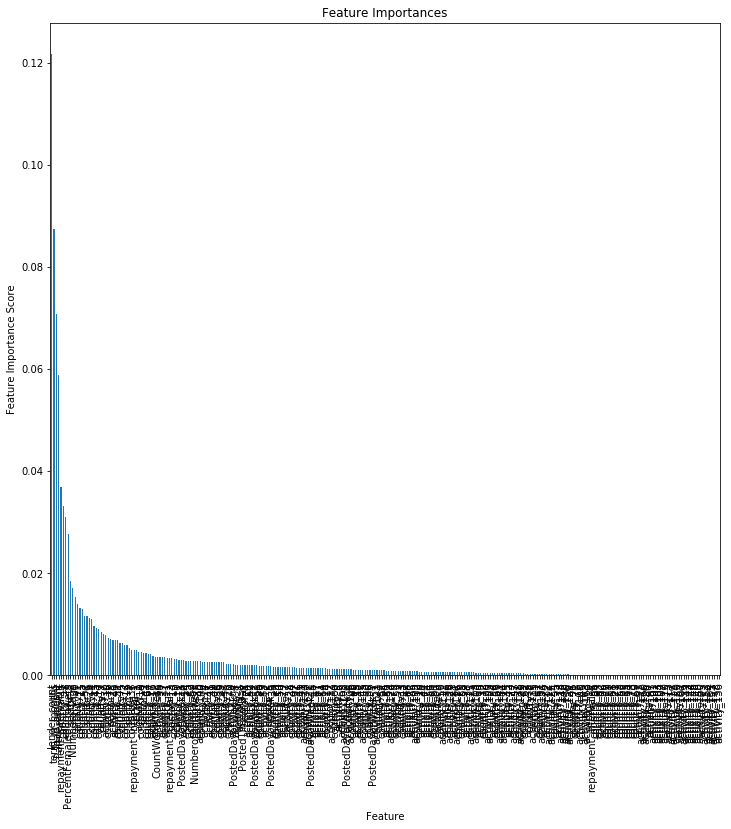

In [18]:
from utils import fit_xgbmodel
# prep = Pipeline(xgb_pipe2.steps[:-1])

# X_train = prep.fit_transform(X_train)
# X_test = prep.transform(X_test)
fit_xgbmodel(xgb_pipe2.steps[-1][1], X_train, y_train, X_test, y_test, scoring='rmse')

In [20]:
import matplotlib.pyplot as plt

In [26]:
feat_imps = pd.Series(xgb_pipe2.steps[-1][1].feature_importances_, index=xgb_pipe2.steps[0][1].get_feature_names()).sort_values(ascending=False)

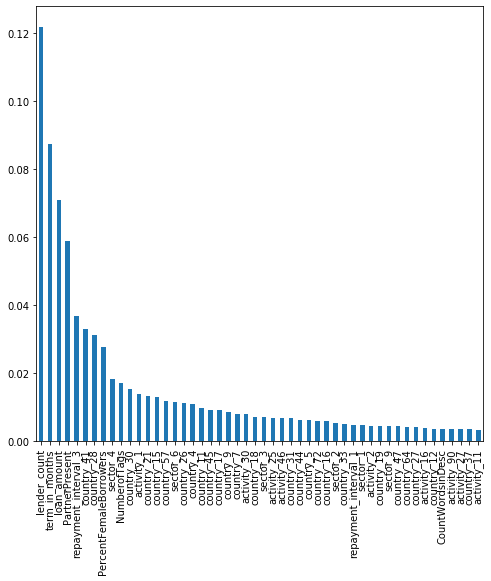

In [28]:
plt.figure(figsize=(8,8))
feat_imps[:50].plot(kind='bar')

In [32]:
xgb_pipe2[-1].score(X_test.values, y_test.values)

0.6935487540099278

In [35]:
import pickle
with open('xgbr_pctfnd3.pickle', 'wb') as f:
    pickle.dump(xgb_pipe2, f)

In [36]:
params2 = {
    'xgbr__min_child_weight':[6,8,10,12]
}

In [53]:
prep = Pipeline(xgb_pipe2.steps[:-1])

testX = prep.fit_transform(X_train)
testy = y_train

In [54]:
fit_params = {
    "xgbr__early_stopping_rounds": 20, 
    "xgbr__eval_metric" : "rmse", 
    "xgbr__eval_set" : [[testX, testy]]
} 

In [44]:
from sklearn.model_selection import GridSearchCV

In [55]:
gsearch2 = GridSearchCV(xgb_pipe2, params2, scoring='r2', cv=5, n_jobs=2)
gsearch2.fit(X_train, y_train, **fit_params)

[09:31:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.441219
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:0.399731
[2]	validation_0-rmse:0.36303
[3]	validation_0-rmse:0.330011
[4]	validation_0-rmse:0.300799
[5]	validation_0-rmse:0.274681
[6]	validation_0-rmse:0.251664
[7]	validation_0-rmse:0.231186
[8]	validation_0-rmse:0.213059
[9]	validation_0-rmse:0.197108
[10]	validation_0-rmse:0.18307
[11]	validation_0-rmse:0.17085
[12]	validation_0-rmse:0.160116
[13]	validation_0-rmse:0.150738
[14]	validation_0-rmse:0.142456
[15]	validation_0-rmse:0.135587
[16]	validation_0-rmse:0.129477
[17]	validation_0-rmse:0.124395
[18]	validation_0-rmse:0.11983
[19]	validation_0-rmse:0.116049
[20]	validation_0-rmse:0.11293
[21]	validation_0-rmse:0.110276
[22]	validation_0-rmse:0.107831
[23]	validation_0-rmse:0.105842
[24]	validation_0-rmse:0.104208
[25]	validation_0-rmse:0.102696
[2

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ohe',
                                        OneHotEncoder(cols=['activity',
                                                            'sector', 'country',
                                                            'repayment_interval',
                                                            'PostedDayofWeek'],
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      return_df=True,
                                                      use_cat_names=False,
                                                      verbose=0)),
                                       ('xgbr',
                                        XGBRegressor(base_score=0

In [56]:
gsearch2.best_params_, gsearch2.best_score_

({'xgbr__min_child_weight': 6}, nan)

In [62]:
pd.DataFrame(gsearch2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbr__min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,682.902726,470.636577,3.510287,1.894368,6,{'xgbr__min_child_weight': 6},0.664597,0.695910,0.693959,NaN,0.691534,NaN,NaN,1
1,487.988546,311.657212,2.828714,1.431875,8,{'xgbr__min_child_weight': 8},0.667805,0.694180,0.694920,NaN,0.691611,NaN,NaN,2
2,466.843230,321.222644,2.618231,1.347552,10,{'xgbr__min_child_weight': 10},0.665619,0.695056,0.694206,NaN,0.691914,NaN,NaN,3
3,441.340802,300.694199,2.446822,1.242944,12,{'xgbr__min_child_weight': 12},0.666888,0.694003,0.693229,NaN,0.690851,NaN,NaN,4


In [57]:
xgb_pipe2.steps[-1][1].set_params(**gsearch2.best_params_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=2, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1, xgbr__min_child_weight=6)

In [58]:
xgb_pipe2.fit(X_train, y_train)
xgb_pipe2.score(X_test, y_test)

[09:43:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6989297069702233

In [59]:
with open('xgbr_pctfnd4.pickle', 'wb') as f:
    pickle.dump(xgb_pipe2, f)

In [63]:
with open('xgbr_pctfnd.pickle', 'rb') as f:
    loaded_pipe1 = pickle.load(f)

[10:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [64]:
loaded_pipe1

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['activity', 'sector', 'country',
                                     'repayment_interval', 'PostedDayofWeek'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('xgbr',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=5, min_child_weight=1,
                              missing=nan, n_estimators=500, n_jobs=2,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
       

In [65]:
preds1 = loaded_pipe1.predict(X_test)


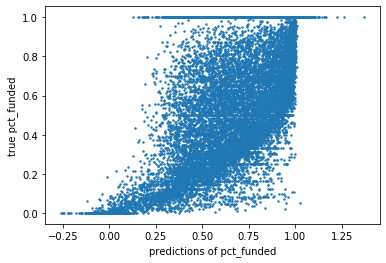

In [71]:
plt.scatter(preds1, y_test, s=2)
plt.xlabel('predictions of pct_funded')
plt.ylabel('true pct_funded')
plt.savefig('pct_funded preds_true.png')

In [72]:
feat_pipe1 = pd.Series(loaded_pipe1.steps[-1][1].feature_importances_, index=loaded_pipe1.steps[0][1].get_feature_names()).sort_values(ascending=False)

In [83]:
feat_pipe1.cumsum()[95]

0.900962

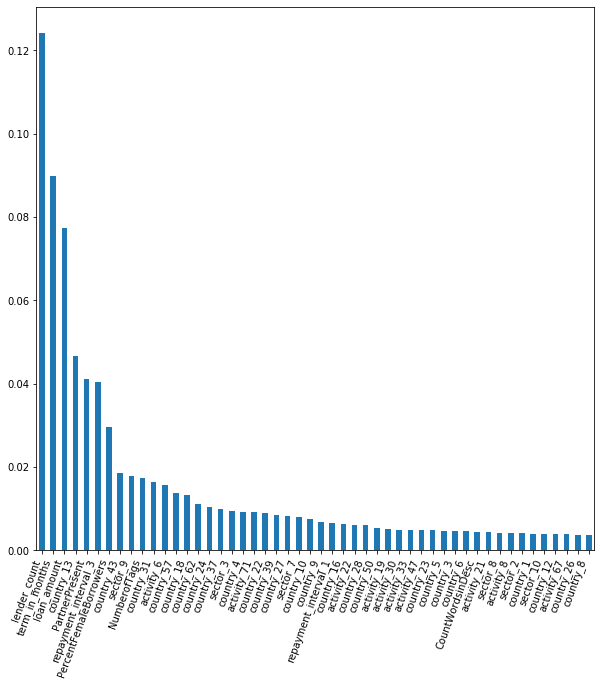

In [93]:
plt.figure(figsize=(10,10))
feat_pipe1[:50].plot(kind='bar')
plt.xticks(rotation=70, ha='right')
plt.savefig('top50feats_pct_fund.png')

In [97]:
X_train.country.unique()

array(['Philippines', 'Colombia', 'Bolivia', 'Egypt', 'Uganda', 'Kenya',
       'Liberia', 'Senegal', 'Cameroon', 'Nepal', 'Peru', 'Samoa',
       'Zimbabwe', 'Nigeria', 'Cambodia', 'Indonesia', 'El Salvador',
       'India', 'Nicaragua', 'Sierra Leone', 'Honduras', 'Georgia',
       'Pakistan', 'Ecuador', 'Madagascar', 'Tajikistan', 'Mali',
       'Kyrgyzstan', 'Guatemala', 'Mozambique', 'Togo', 'Paraguay',
       'Vietnam', 'Mexico', 'Armenia', 'Haiti', 'Lebanon', 'Palestine',
       'Azerbaijan', 'United States', 'Timor-Leste',
       'The Democratic Republic of the Congo', 'Myanmar (Burma)',
       'Burundi', 'Rwanda', 'Jordan', 'Costa Rica', 'Ghana', 'Tanzania',
       'Solomon Islands', 'Albania', 'Dominican Republic', 'Iraq',
       'Brazil', 'Kosovo', 'Israel', 'Yemen', 'South Sudan', 'Malawi',
       'Ukraine', 'Turkey', 'Benin', 'Puerto Rico', 'Zambia',
       "Lao People's Democratic Republic", 'Lesotho', 'China',
       'Burkina Faso', 'South Africa', 'Thailand', 'Mongolia'

In [98]:
ohe2 = OneHotEncoder()

In [102]:
ohe2.fit_transform(X_train['country'])[:25]

,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,country_9,country_10,...,country_76,country_77,country_78,country_79,country_80,country_81,country_82,country_83,country_84,country_85
640967,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496221,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
625989,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
534959,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
642405,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356999,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542702,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273379,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26414,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37245,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X_train['country'].head(20)

640967    Philippines
496221       Colombia
625989    Philippines
534959       Colombia
642405    Philippines
356999        Bolivia
542702          Egypt
273379         Uganda
26414           Kenya
37245         Liberia
308802        Senegal
626764       Cameroon
548660    Philippines
167001    Philippines
366861          Nepal
167624        Bolivia
377153    Philippines
180867    Philippines
468799    Philippines
81431     Philippines
Name: country, dtype: object